In [1]:
import pandas as pd # import pandas 
import matplotlib.pyplot as plt
import os 
bookings = pd.read_csv("/Users/brindamunuswamy/Desktop/MIS581/h1Features.csv") # read CSV into pandas
bookings.head(15) #reading top 5 rows

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,different_assigned_room
0,0,342,2015,7,27,0,0,2,0.0,0,...,0,0,0,3,1,0,0.00,0,0,0
1,0,737,2015,7,27,0,0,2,0.0,0,...,0,0,0,4,1,0,0.00,0,0,0
2,0,7,2015,7,27,0,1,1,0.0,0,...,0,0,0,0,1,0,75.00,0,0,1
3,0,13,2015,7,27,0,1,1,0.0,0,...,0,0,0,0,1,0,75.00,0,0,0
4,0,14,2015,7,27,0,2,2,0.0,0,...,0,0,0,0,1,0,98.00,0,1,0
5,0,14,2015,7,27,0,2,2,0.0,0,...,0,0,0,0,1,0,98.00,0,1,0
6,0,0,2015,7,27,0,2,2,0.0,0,...,0,0,0,0,1,0,107.00,0,0,0
7,0,9,2015,7,27,0,2,2,0.0,0,...,0,0,0,0,1,0,103.00,0,1,0
8,1,85,2015,7,27,0,3,2,0.0,0,...,0,0,0,0,1,0,82.00,0,1,0
9,1,75,2015,7,27,0,3,2,0.0,0,...,0,0,0,0,1,0,105.50,0,0,0


In [2]:
bookings.info() # this is selected list of features for prediction model h1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     40060 non-null  int64  
 1   lead_time                       40060 non-null  int64  
 2   arrival_date_year               40060 non-null  int64  
 3   arrival_date_month              40060 non-null  int64  
 4   arrival_date_week_number        40060 non-null  int64  
 5   stays_in_weekend_nights         40060 non-null  int64  
 6   stays_in_week_nights            40060 non-null  int64  
 7   adults                          40060 non-null  int64  
 8   children                        40060 non-null  float64
 9   babies                          40060 non-null  int64  
 10  meal                            40060 non-null  int64  
 11  market_segment                  40060 non-null  int64  
 12  distribution_channel            

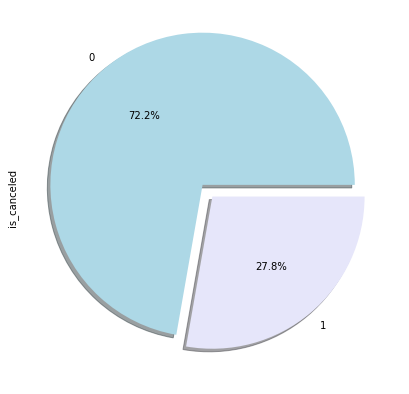

In [3]:
# cancellation rate benchmark based on full data set for h1 
import matplotlib.pyplot as plt
piedata = bookings['is_canceled'].value_counts()
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) 
plt.show() # displaying only chart without the extra information

In [29]:
# creating dataframe with predictor variables - columns 1-22
X=bookings.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       40060 non-null  int64  
 1   arrival_date_year               40060 non-null  int64  
 2   arrival_date_month              40060 non-null  int64  
 3   arrival_date_week_number        40060 non-null  int64  
 4   stays_in_weekend_nights         40060 non-null  int64  
 5   stays_in_week_nights            40060 non-null  int64  
 6   adults                          40060 non-null  int64  
 7   children                        40060 non-null  float64
 8   babies                          40060 non-null  int64  
 9   meal                            40060 non-null  int64  
 10  market_segment                  40060 non-null  int64  
 11  distribution_channel            40060 non-null  int64  
 12  is_repeated_guest               

In [30]:
#df = df.astype({"Column 1": float, "Column 2": int})
#X=X.astype({"adr": int})

In [32]:
# creating dataframe with dependent variable column 0 
Y = bookings.iloc[:,[0]]
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   is_canceled  40060 non-null  int64
dtypes: int64(1)
memory usage: 313.1 KB


In [33]:
#creating test and train dataset in 70-30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [47]:
Y_train['is_canceled'].value_counts()

0    20179
1     7863
Name: is_canceled, dtype: int64

In [48]:
Y_test['is_canceled'].value_counts()

0    8759
1    3259
Name: is_canceled, dtype: int64

In [34]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression(solver='liblinear', random_state=0)#default parameters without explanation

In [35]:
import numpy as np
LogReg.fit(X_train,np.ravel(Y_train)) # training the model with training datasets 

LogisticRegression(random_state=0, solver='liblinear')

In [36]:
Y_pred=LogReg.predict(X_test) # Predictions for test data set
predictions = [round(value) for value in Y_pred]

In [46]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, predictions)
# accuracy of the model based on predictions and actuals of the dependent variable
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.12%


In [38]:
# default values with explanations 
#rf10=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            #max_depth=None, max_features='auto', max_leaf_nodes=None,
            #min_impurity_decrease=0.0, min_impurity_split=None,
            #min_samples_leaf=1, min_samples_split=2,
            #min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            #oob_score=False, random_state=None, verbose=0,
            #warm_start=False)
#rf10.fit(X_train,Y_train)
#Y_pred10=rf10.predict(X_test)
#print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred10))

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
LogReg_score = cross_val_score(LogReg, X, np.ravel(Y), cv=10, scoring='roc_auc') # evaluation of model on AUC score
print("Mean AUC Score - Random Forest: ", LogReg_score.mean())

Mean AUC Score - Random Forest:  0.753914234189916


In [41]:
print(confusion_matrix(Y_test, Y_pred)) # evaluation of model using confusion matrix

[[8268  491]
 [1898 1361]]


In [42]:
print(classification_report(Y_test, Y_pred)) # evaluation of model using classification report
# the values for class '1' is considered for model comparison

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      8759
           1       0.73      0.42      0.53      3259

    accuracy                           0.80     12018
   macro avg       0.77      0.68      0.70     12018
weighted avg       0.79      0.80      0.78     12018



In [43]:
df = pd.DataFrame(data=Y_pred, columns=["canceled"]) # checking the predictions for benchmark comparison 
df['canceled'].value_counts()

0    10166
1     1852
Name: canceled, dtype: int64

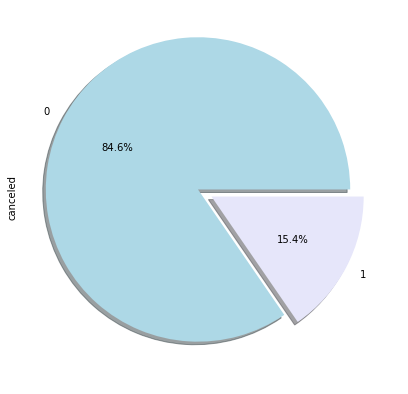

In [44]:
# using pie chart to show cancellation rate as predicted by the model 
piedata = df['canceled'].value_counts()
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) 
plt.show() # displaying only chart without the extra information
#benchmark
#0    28938
#1    11122